In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/ponna/Desktop/ARIMA-And-Seasonal-ARIMA-master/perrin-freres-monthly-champagne-.csv")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')

In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [6]:
df.columns=["Month","Sales"]

In [7]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
df1=df[:105]

In [9]:
df1.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
df1

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null object
Sales    105 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [12]:
df1.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [13]:
df1["Month"]=pd.to_datetime(df1["Month"])

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null datetime64[ns]
Sales    105 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [15]:
df1.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [16]:
df1.set_index("Month",inplace=True)

In [17]:
df1.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


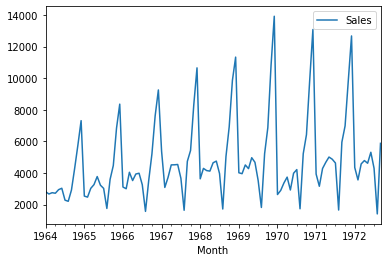

In [18]:
df1.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
adfuller(df1["Sales"])

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [22]:
#p value more than 0.05 therfore the data is non stationery

In [45]:
df1["Seasonal first differece"]=df1["Sales"]-df1["Sales"].shift(12)

In [46]:
df1.head(14)

,Sales,Seasonal first differece
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [47]:
adfuller(df1["Seasonal first differece"].dropna())         

(-7.626619157213163,
 2.060579696813685e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

In [48]:
#lags used is 0 it is stationery

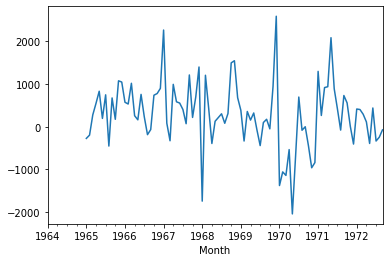

In [49]:
df1["Seasonal first differece"].plot()

In [57]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

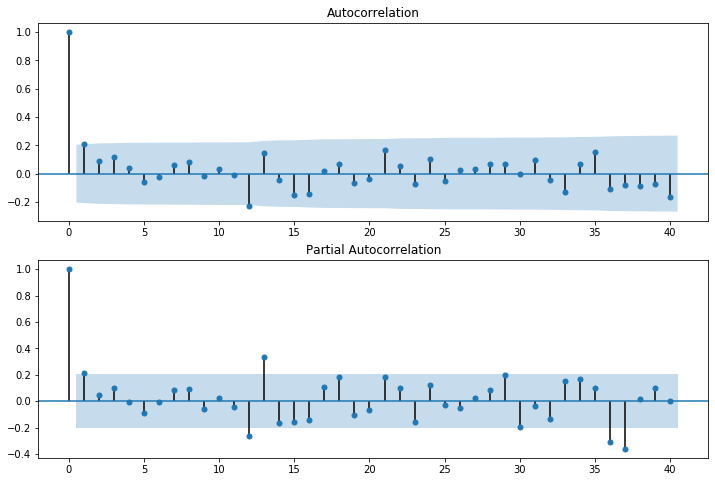

In [63]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df1["Seasonal first differece"].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df1["Seasonal first differece"].iloc[13:],lags=40,ax=ax2)

In [64]:
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [66]:
model=ARIMA(df1["Sales"],order=(1,1,0))

C:\Users\ponna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ponna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [67]:
model_fit=model.fit()

In [71]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -966.440
Method:                       css-mle   S.D. of innovations           2627.307
Date:                Fri, 22 Jan 2021   AIC                           1938.880
Time:                        13:05:54   BIC                           1946.813
Sample:                    02-01-1964   HQIC                          1942.094
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.5332    236.330      0.112      0.911    -436.665     489.731
ar.L1.D.Sales    -0.0911      0.099     -0.925      0.357      -0.284       0.102
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -10.9746           +0.0000j           10.9746            0.5000
-----------------------------------------------------------------------------
"""

In [73]:
df1

,Sales,Seasonal first differece
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


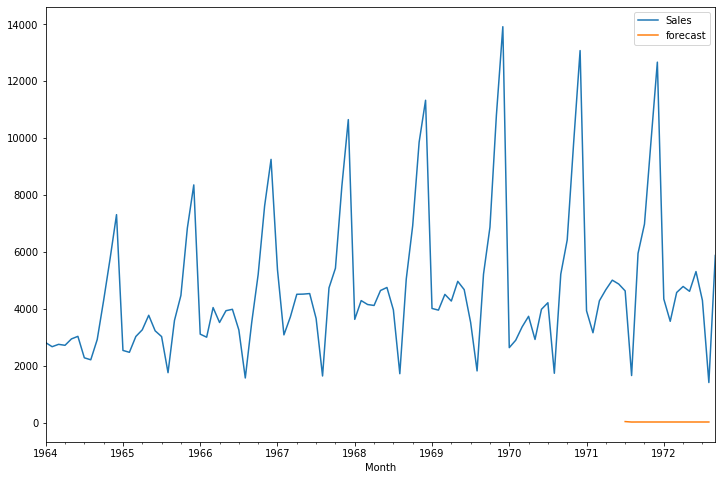

In [75]:
df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df1[['Sales','forecast']].plot(figsize=(12,8))

In [76]:
#ARIMA model doesn't fit since it is seasonal data
#should use Sarimax

In [77]:
import statsmodels.api as sm

In [78]:
model=sm.tsa.statespace.SARIMAX(df1["Sales"],order=(1,1,0),seasonal_order=(1,1,0,12))
result=model.fit()

C:\Users\ponna\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


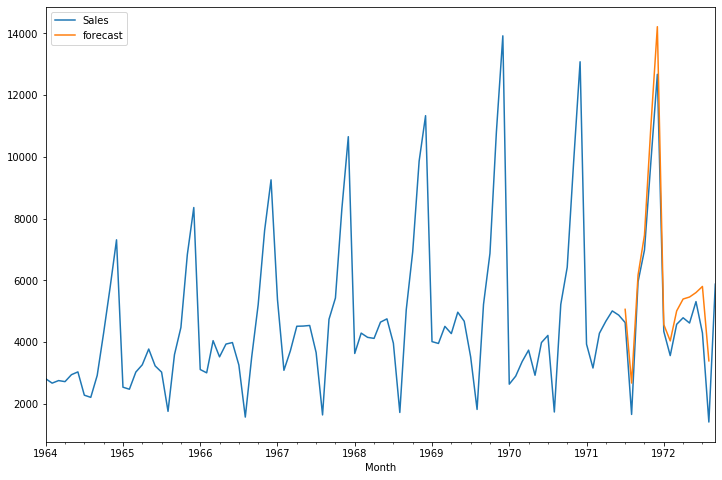

In [82]:
df1["forecast"]=result.predict(start=90,end=103,dynamic=True)
df1[["Sales","forecast"]].plot(figsize=(12,8))

In [91]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [92]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [104]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [108]:
future_dataset_df.head()

,Sales,Seasonal first differece,forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN


In [109]:
future_df=pd.concat([df1,future_dataset_df])

In [110]:
future_df.head()

,Sales,Seasonal first differece,forecast
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN


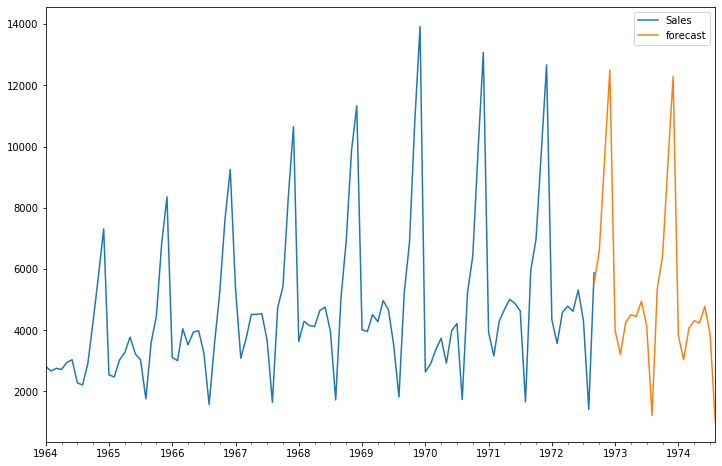

In [123]:
future_df["forecast"]=result.predict(start=104,end=128,dynamic=True)
future_df[["Sales","forecast"]].plot(figsize=(12,8))

In [118]:
#predicted the future sales of 2 years

In [122]:
future_df.shape

(128, 3)

In [124]:
future_df.tail()

,Sales,Seasonal first differece,forecast
1974-04-01,NaN,NaN,4312.526081
1974-05-01,NaN,NaN,4233.052657
1974-06-01,NaN,NaN,4777.972171
1974-07-01,NaN,NaN,3902.814455
1974-08-01,NaN,NaN,1001.828717
